<a href="https://colab.research.google.com/github/bforeman44/FDSfE_BForeman/blob/main/classdemos/11_15_22_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pylab as plt

In [2]:
url = "https://www1.nyc.gov/html/gbee/downloads/excel/nyc_benchmarking_disclosure_2017_consumption_data.xlsx"
df = pd.read_excel(url, "Information and Metrics")

In [3]:
df.head(5)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2 (self-reported),...,Annual Maximum Demand (kW),Annual Maximum Demand (MM/YYYY),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Water Use (All Water Sources) (kgal),Water Use Intensity (All Water Sources) (gal/ft²),Water Required?,Generation Date,DOF Benchmarking Submission Status
0,1,4593574,The Argonaut Building,NaN,NaN,1.010288e+09,1010287502,1024898,224 West 57th St,NaN,...,NaN,NaT,732.4,76.3,656.1,3635.5,21.46,Not found,2018-02-14,Not found
1,3,2967701,Cathedral Preparatory Seminary,NaN,NaN,4.018720e+09,4-01872-0007,4046340,56-25 92nd Street,NaN,...,NaN,NaT,164.5,109.9,54.6,102.9,1.09,Not found,2018-02-14,Not found
2,4,4898531,The Nomad Hotel,NaN,NaN,1.008290e+09,1-00829-0050,1080710,1170 Broadway,NaN,...,NaN,NaT,1150.2,438.0,712.3,10762.6,86.10,Not found,2018-02-14,Not found
3,5,2917939,10 West 27 Street Corp,NaN,NaN,1.008280e+09,1-00828-0053,1015657,1155 Broadway,NaN,...,NaN,NaT,273.4,98.2,175.3,790.1,15.80,Not found,2018-02-14,Not found
4,6,3878205,Westbury Realty,NaN,NaN,1.000650e+09,1-00065-0024,1001105,24 John Street,NaN,...,NaN,NaT,90.7,0.0,90.7,143.0,2.86,Not found,2018-02-14,Not found


In [4]:
df.columns

Index(['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2 (self-reported)', 'Postal Code', 'Street Number',
       'Street Name', 'Borough', 'DOF Gross Floor Area (ft²)',
       'Self-Reported Gross Floor Area (ft²)',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings', 'Occupancy', 'Metered Areas (Energy)',
       'Metered Areas  (Water)', 'ENERGY STAR Score', 'Source EUI (kBtu/ft²)',


In [5]:
year = "Year Built"
elec = "Electricity Use - Grid Purchase (kBtu)"

features = df[[year,elec]]

In [6]:
features

,Year Built,Electricity Use - Grid Purchase (kBtu)
0,1909,6551394.1
1,1963,616343.7
2,1999,8033914.4
3,1994,1976691.9
4,2012,1022951.6
...,...,...
34350,1931,316524.4
34351,1925,277672.0
34352,1926,629677.8
34353,1910,6979300.9


In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Built                              34355 non-null  int64  
 1   Electricity Use - Grid Purchase (kBtu)  31576 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 536.9 KB


In [8]:
features.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [9]:
features.isna().sum()

Year Built                                0
Electricity Use - Grid Purchase (kBtu)    0
dtype: int64

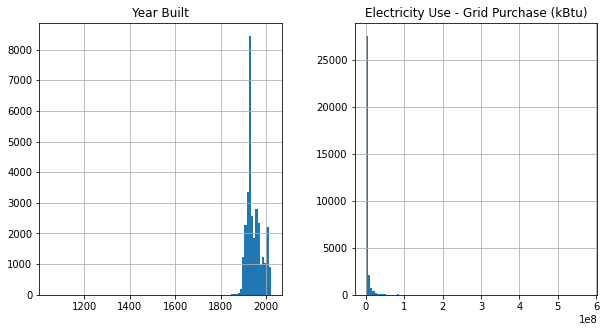

In [10]:
features.hist(figsize = (10,5), bins = 100);

In [11]:
features = features[features[year]>1900]
features = features[features[elec]>0]

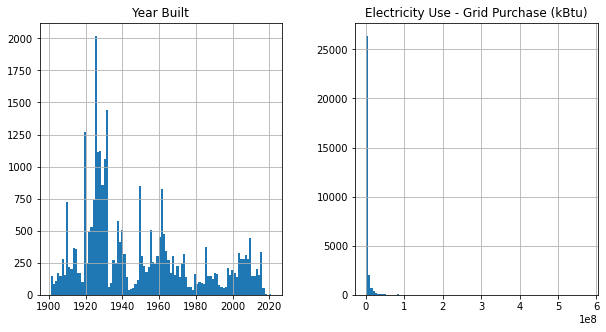

In [12]:
features.hist(figsize = (10,5), bins = 100);

In [13]:
features[elec] = np.log10(features[elec])

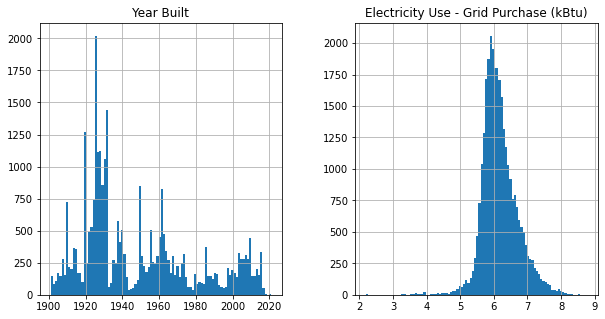

In [14]:
features.hist(figsize = (10,5), bins = 100);

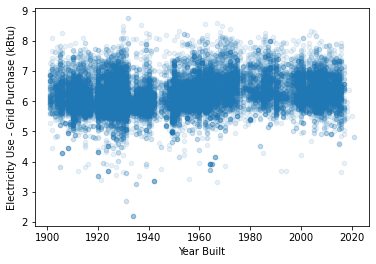

In [15]:
features.plot(year,elec, kind = "scatter", alpha = 0.1);

In [16]:
from sklearn.cluster import KMeans

In [17]:
km = KMeans(n_clusters = 7, random_state = 123, verbose = 1)

In [18]:
km.fit(features)

Initialization complete
Iteration 0, inertia 634030.5785099715
Iteration 1, inertia 626273.2828813381
Iteration 2, inertia 625308.5768932183
Converged at iteration 2: center shift 0.003361412149605049 within tolerance 0.04689654968509463.
Initialization complete
Iteration 0, inertia 705202.8435434541
Iteration 1, inertia 551948.0482187258
Iteration 2, inertia 528863.9587357645
Iteration 3, inertia 522112.33429250284
Iteration 4, inertia 516496.8156529233
Iteration 5, inertia 513872.99208377907
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 886792.9686619241
Iteration 1, inertia 689185.9352965308
Iteration 2, inertia 665619.470996261
Iteration 3, inertia 652372.5973985458
Iteration 4, inertia 647283.0946694037
Iteration 5, inertia 643660.7972287369
Iteration 6, inertia 642030.4721232419
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 663699.3837297613
Iteration 1, inertia 523002.68277998525
Iteration 

KMeans(n_clusters=7, random_state=123, verbose=1)

In [19]:
km.n_clusters

7

In [20]:
km.cluster_centers_

array([[1926.24497476,    6.02057293],
       [2007.30286786,    6.35988119],
       [1965.88762136,    6.37374902],
       [1987.02498799,    6.47457785],
       [1938.43505535,    5.98922143],
       [1910.55898794,    6.13874665],
       [1953.12349398,    6.18840765]])

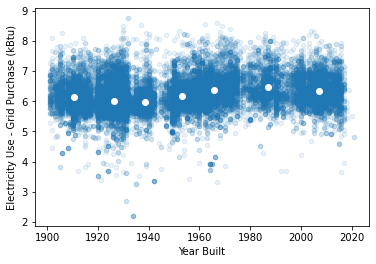

In [21]:
features.plot(year,elec, kind="scatter", alpha = 0.1)

for cc in range(km.n_clusters):
  plt.plot(km.cluster_centers_[cc,0], km.cluster_centers_[cc,1], "wo")

In [22]:
km.labels_

array([5, 2, 1, ..., 0, 5, 3], dtype=int32)

In [23]:
np.unique(km.labels_)

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

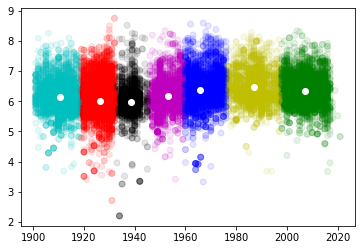

In [24]:
clrs = np.array(["r",'g', 'b', 'y', 'k', 'c', 'm'])

plt.scatter(features[year], features[elec],alpha = 0.1, color = clrs[km.labels_]);
for cc in range(km.n_clusters):
  plt.plot(km.cluster_centers_[cc,0], km.cluster_centers_[cc,1], "wo")

In [25]:
features = (features - features.mean()) / features.std()

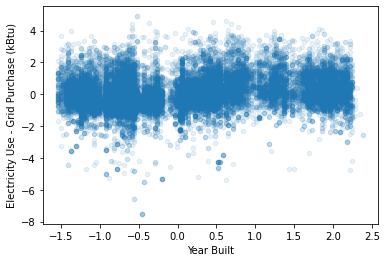

In [26]:
features.plot(year, elec, kind = 'scatter', alpha = 0.1);

In [27]:
km2 = KMeans(n_clusters =3, random_state = 746)
km2.fit(features)
KMeans(n_clusters = 3, random_state = 746)

KMeans(n_clusters=3, random_state=746)

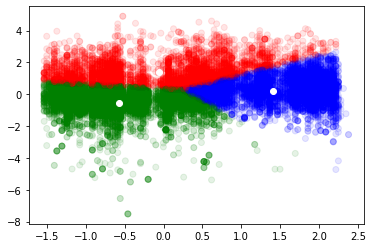

In [30]:
clrs = np.array(["r",'g', 'b', 'y', 'k', 'c', 'm'])

plt.scatter(features[year], features[elec],alpha = 0.1, color = clrs[km2.labels_]);
for cc in range(km2.n_clusters):
  plt.plot(km2.cluster_centers_[cc,0], km2.cluster_centers_[cc,1], "wo")